In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import pickle

font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['figure.figsize'] = [9, 5.5]
plt.rcParams['figure.dpi'] = 300

N_TASKS = 500
N_ARMS = 80
OPT_SIZE = 8 # >1
HORIZON = 4000
N_EXPS = 5 #No. of repeat experiments

GAP_THRESHOLD = np.sqrt(N_ARMS*np.log(N_TASKS)/HORIZON)
gap = min(1,GAP_THRESHOLD*1.1)
kwargs = {
          'gap_constrain':gap,
          'is_adversarial': True,
          'skip_list': ["E_BASS", "G_BASS_FC", "EE"],
          'timeout': 45, # maximum duration for each experiment. Unit = minute. -1 = unlimited
          'quiet': True,
          'linewidth': 7,
          'plot_legend': True,
          'OG_scale': 0.008,
          'n_optimal': 1,
         }
if kwargs['is_adversarial']:
    setting = "Adversarial"
else:
    setting = "Stochastic"
assert N_ARMS<=HORIZON, f"The number of arm ({N_ARMS}) must be smaller than the horizon ({HORIZON})"
assert OPT_SIZE<=N_ARMS and OPT_SIZE>1, f"The subset size ({OPT_SIZE}) must be smaller than the number of arm ({N_ARMS}) and >1"
print(f'GAP_THRESHOLD = {GAP_THRESHOLD}, actual gap = {gap}')

PE_params = 4*np.log(max(np.exp(1), N_ARMS*HORIZON/4))
if N_ARMS*PE_params > HORIZON:
    print(f"WARNING (Phased Elimination): phase 1 duration ({N_ARMS*PE_params}) is larger than the horizon ({HORIZON}) \n=> increase horizon and/or change n_arms.")

if "OG" not in kwargs['skip_list']:
    og_gamma = kwargs['OG_scale']*OPT_SIZE*(1+np.log(N_TASKS))*(N_ARMS*np.log(N_ARMS)/N_TASKS)**(1/3)
    if og_gamma<0 or og_gamma>1:
        print(f"WARNING (OG baseline): og_gamma ({og_gamma}) must in range [0,1]. Decrease # of arms and subset size or Increase # of task")
    print(f"og_gamma = {og_gamma}")

## Regret vs Number of tasks

In [ ]:
# task_list = np.arange(200, 251, 50)
# (X, regret_dict, title, xlabel, ylabel) = utils.task_exp(N_EXPS, HORIZON, N_ARMS, OPT_SIZE, task_list, **kwargs)
# # pickle.dump(regret_dict, open("results/tasks.p", "wb"))
# pass

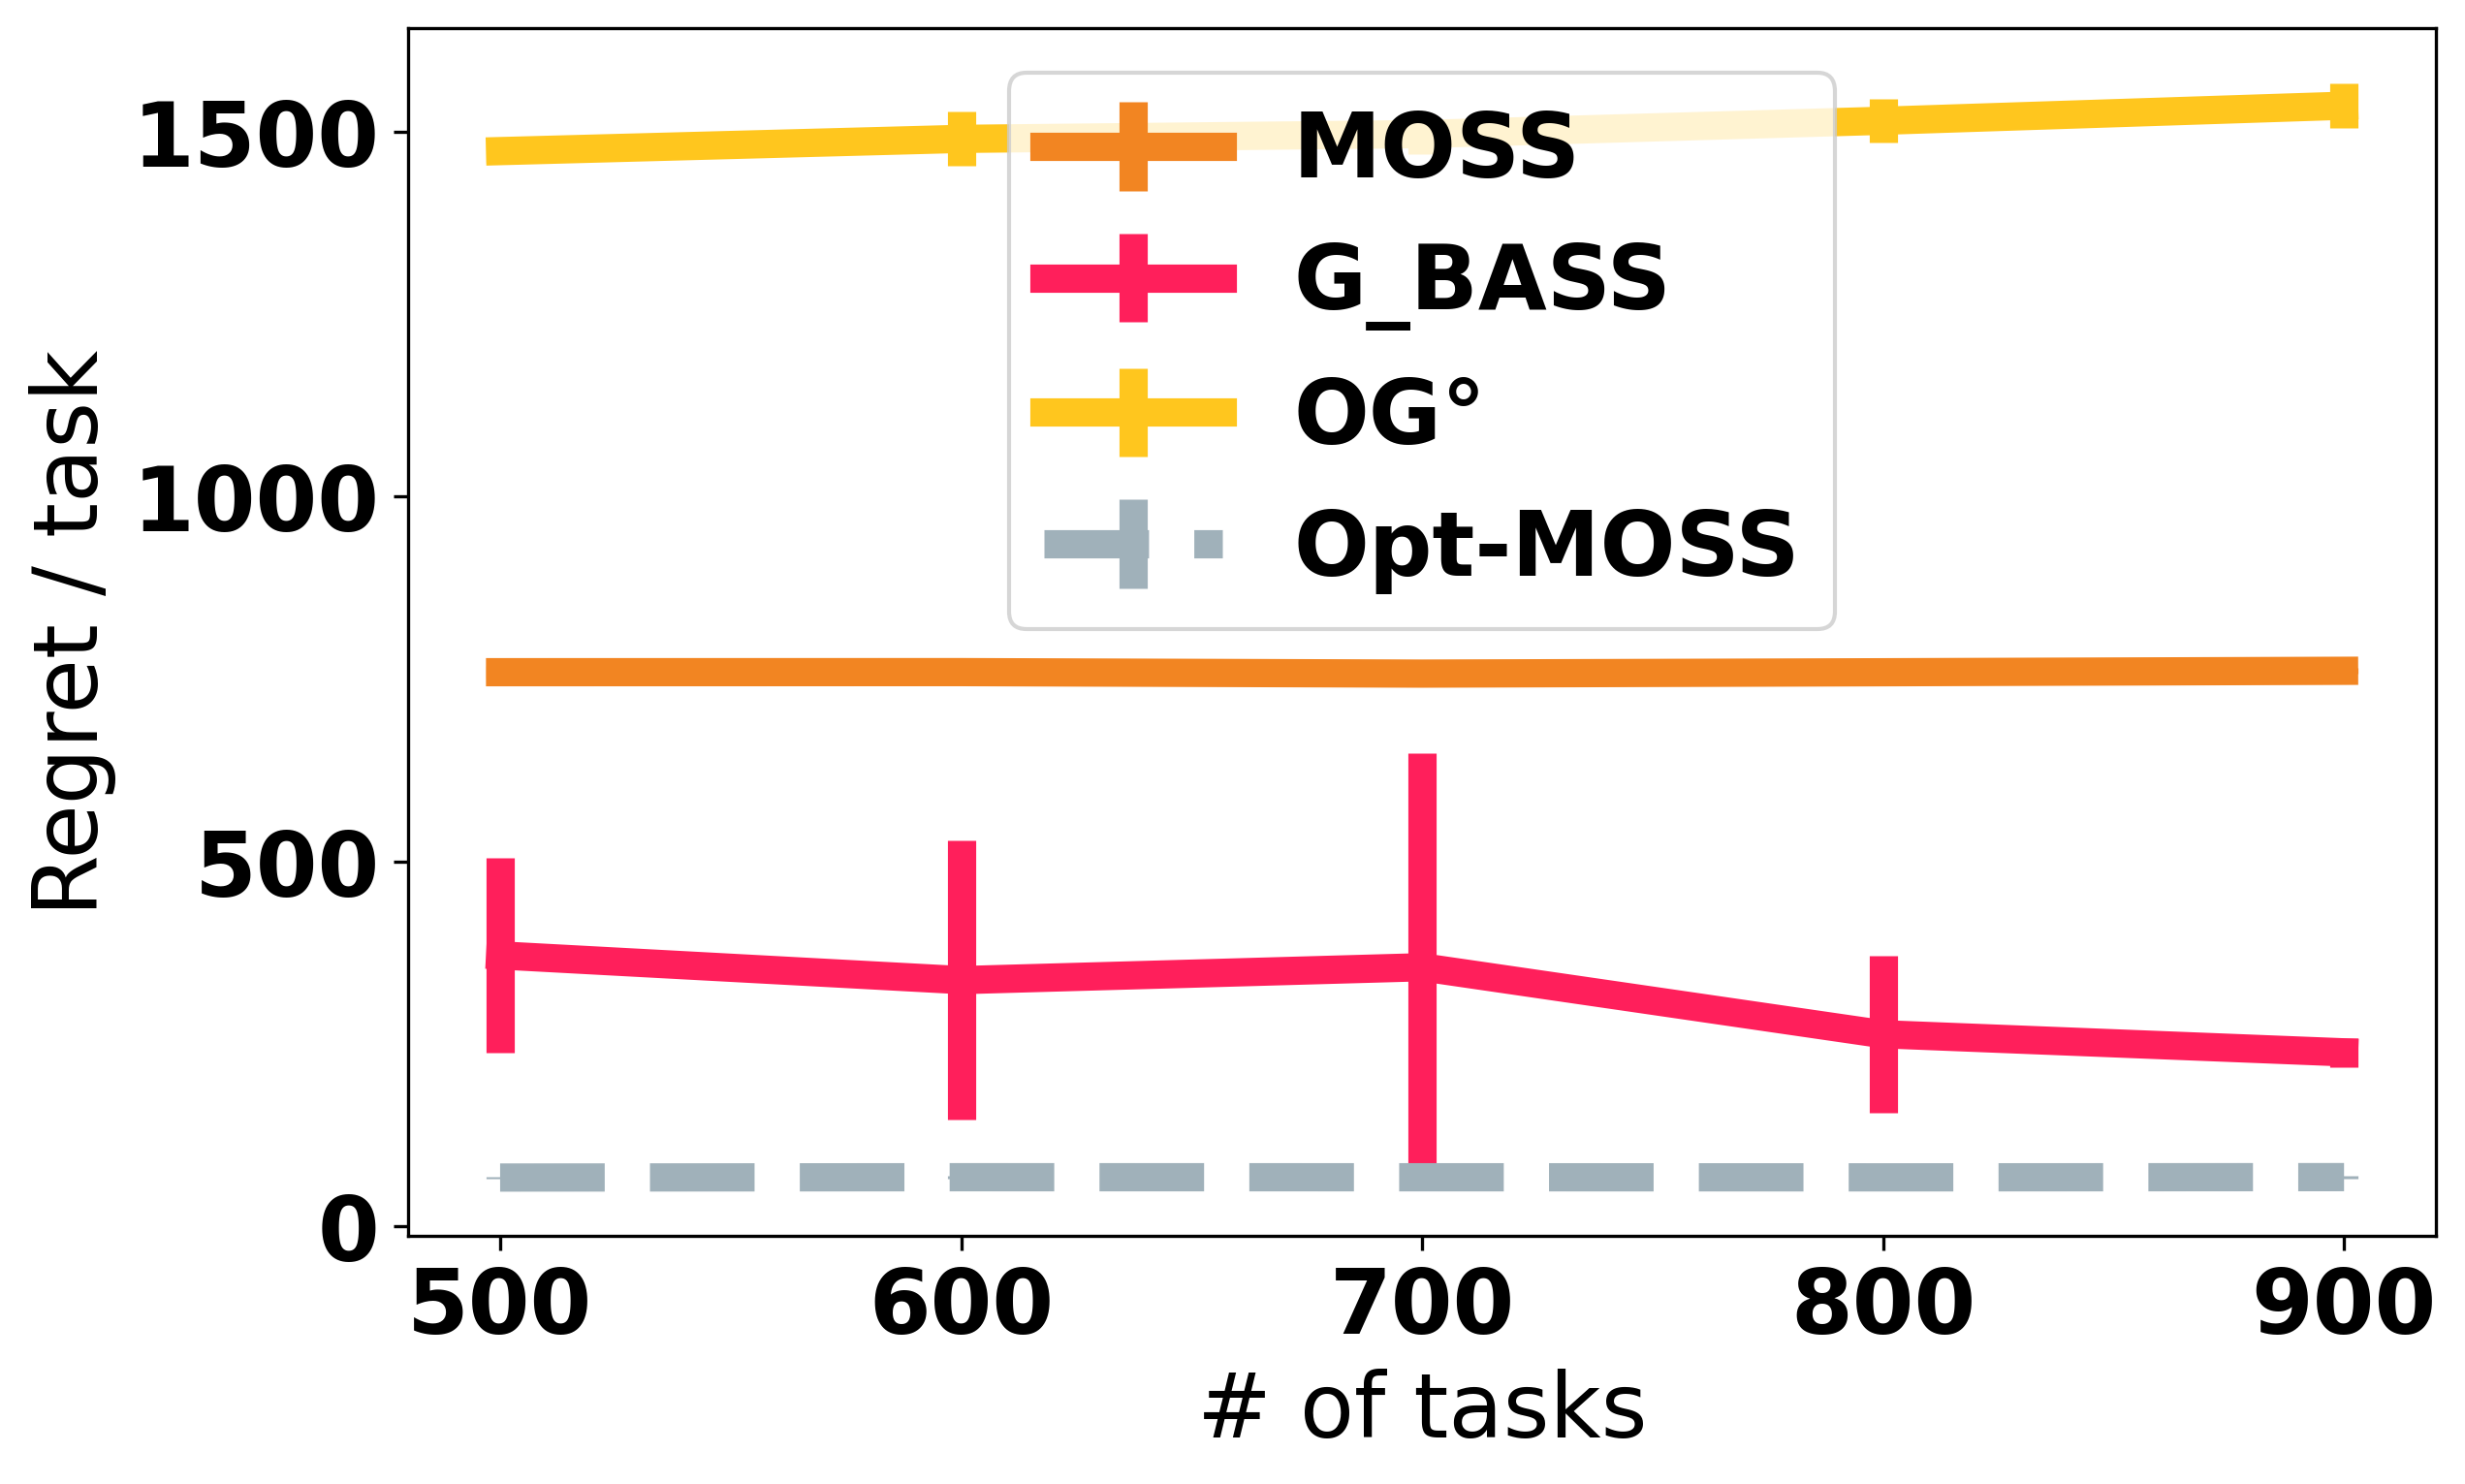

In [2]:
# Plot from loaded cache file
X = np.arange(500, 911, 100)
gap = kwargs['gap_constrain']
regret_dict = pickle.load(open("results/cache_tasks.p", "rb"))
utils.plot(X, regret_dict, '', '# of tasks', 'Regret / task', **kwargs)
pass

## Regret vs Horizon

In [ ]:
# horizon_list = np.arange(120, 126, 5)
# (X_h, regret_dict_h, title, xlabel, ylabel) = \
# utils.horizon_exp(N_EXPS, N_TASKS, N_ARMS, OPT_SIZE, 
#                   horizon_list = horizon_list, **kwargs)
# # pickle.dump(regret_dict_h, open("results/horizon.p", "wb"))
# pass

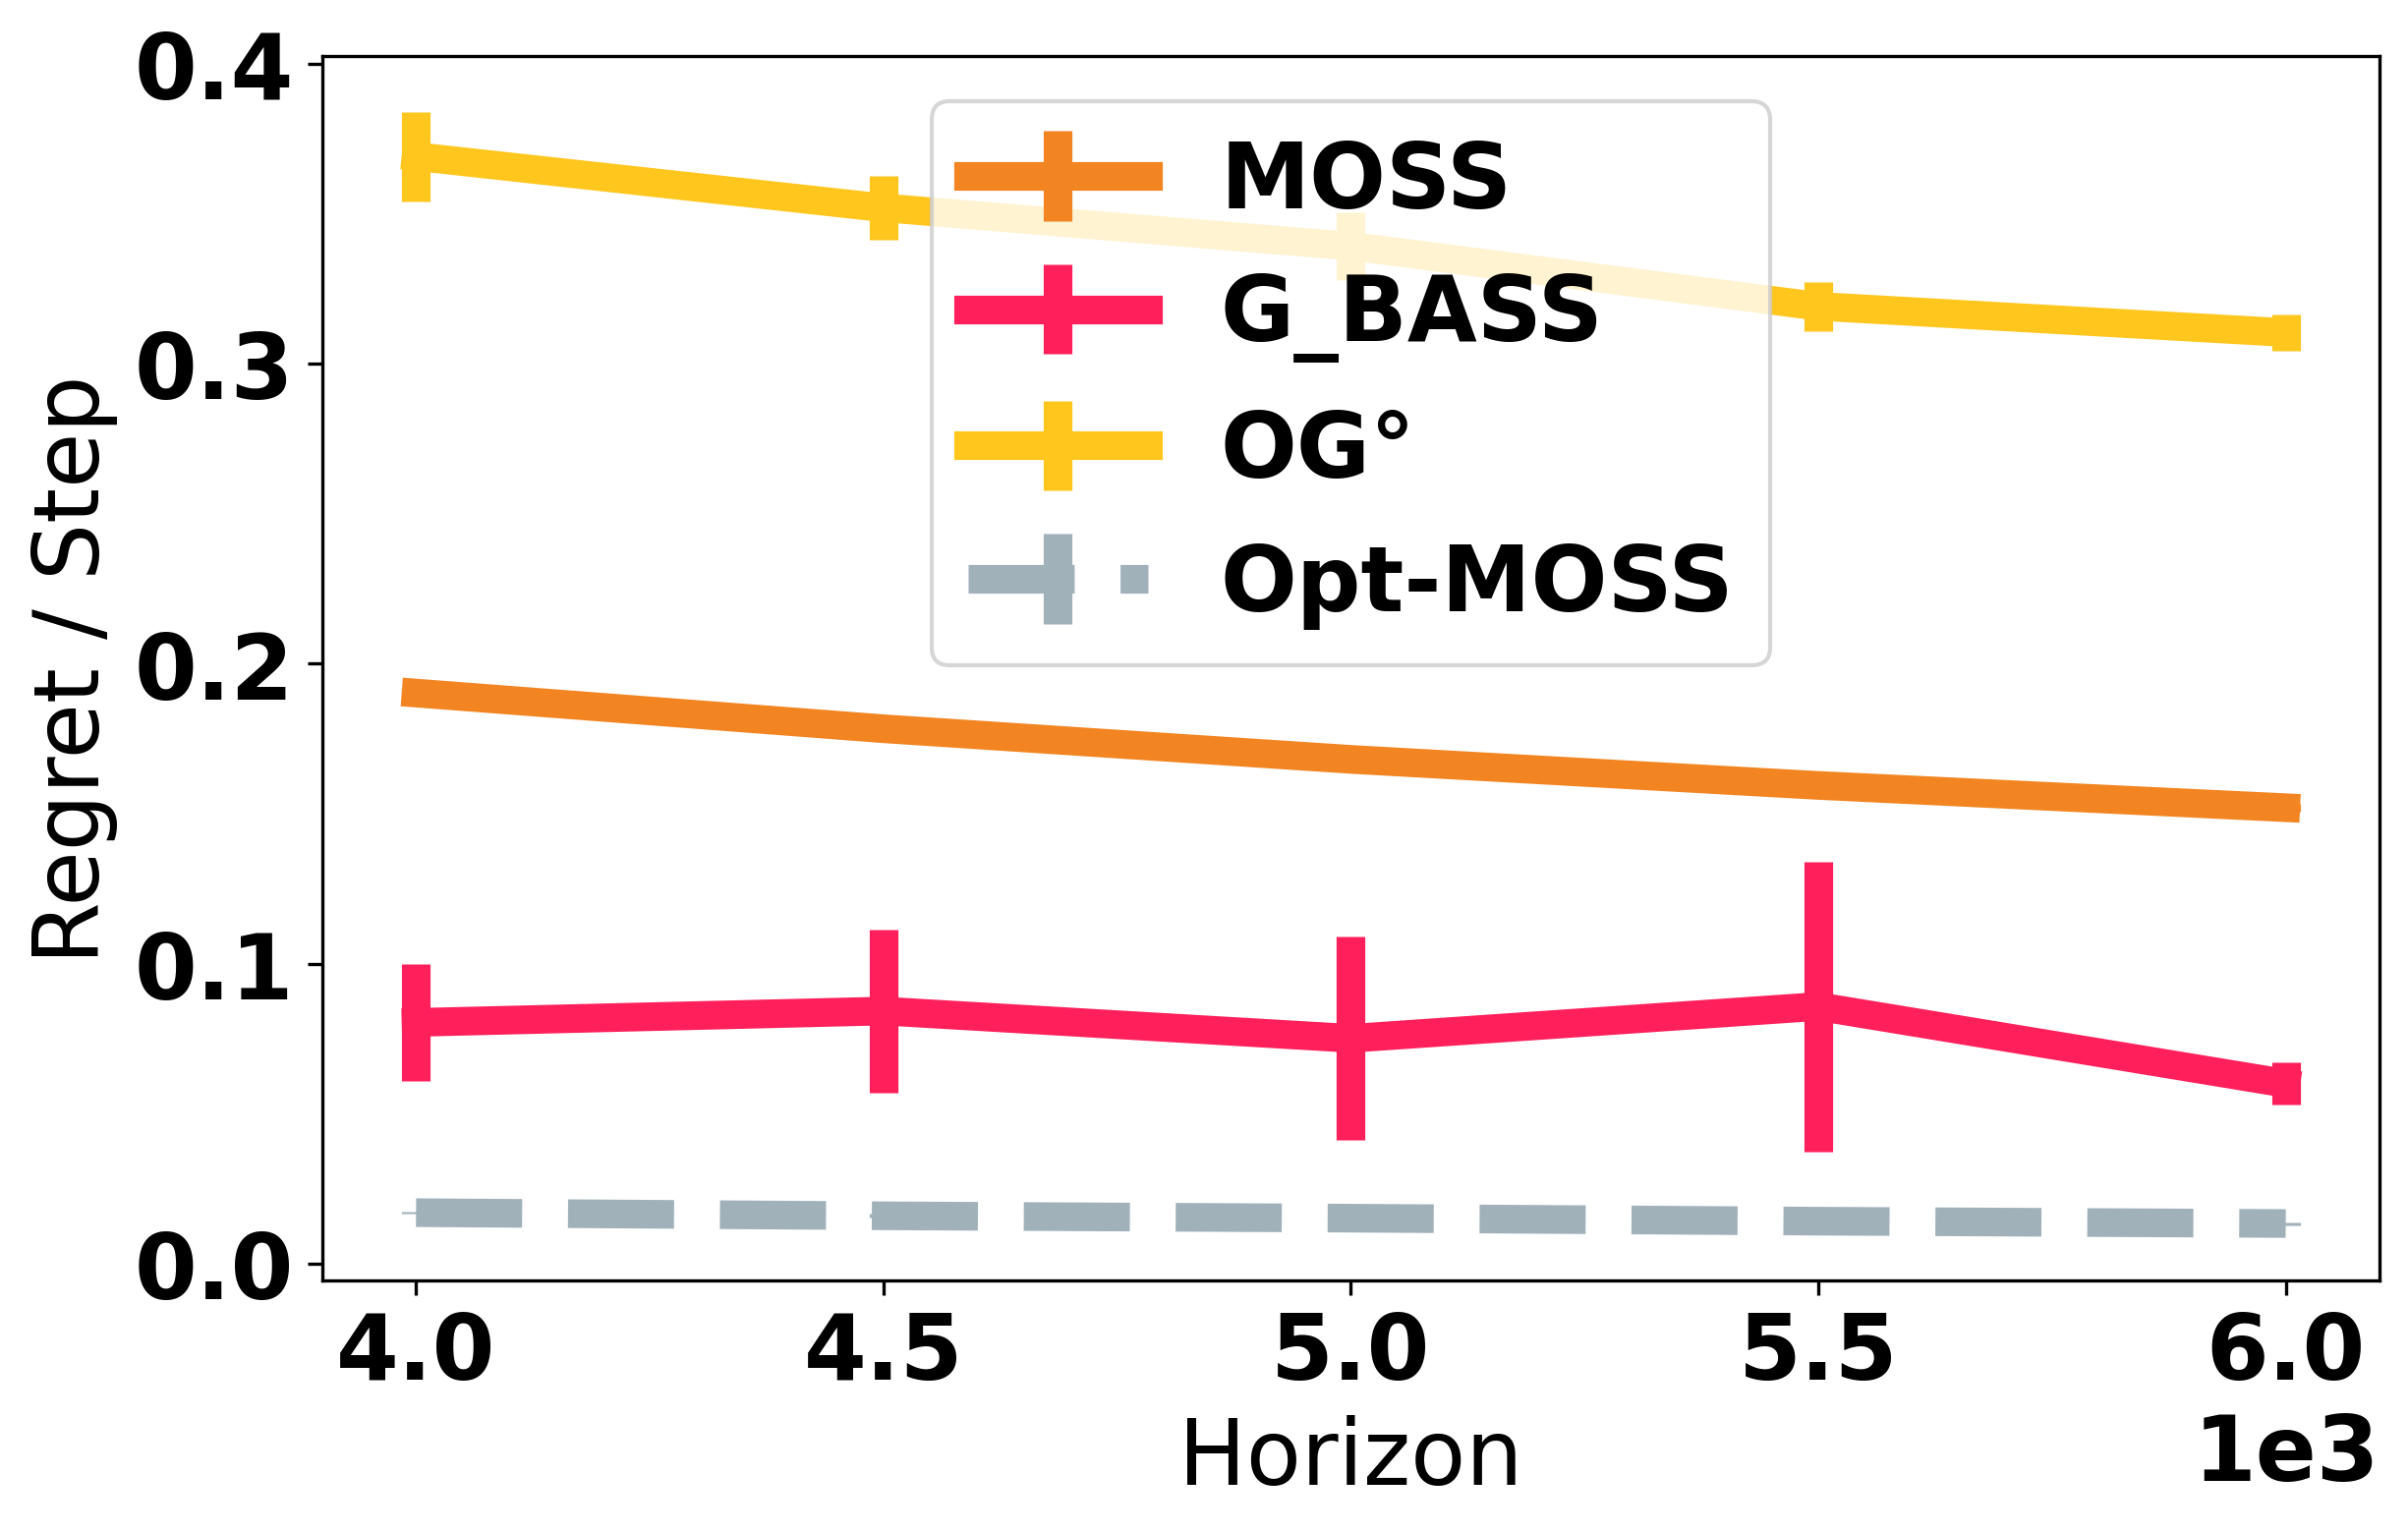

In [3]:
# Plot from loaded cache file
X_h = np.arange(4000, 6006, 500) # small stochastic
regret_dict_h = pickle.load(open("results/cache_horizon.p", "rb"))
utils.plot(X_h, regret_dict_h, '', 'Horizon', 'Regret / Step', **kwargs)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

## Regret vs # of arm

In [ ]:
# n_arms_list = np.arange(3,8,1)
# (X_b, regret_dict_b, title, xlabel, ylabel) = \
# utils.arms_exp(N_EXPS, N_TASKS, HORIZON, OPT_SIZE, n_arms_list, **kwargs)
# # pickle.dump(regret_dict_b, open("results/arms.p", "wb"))
# pass

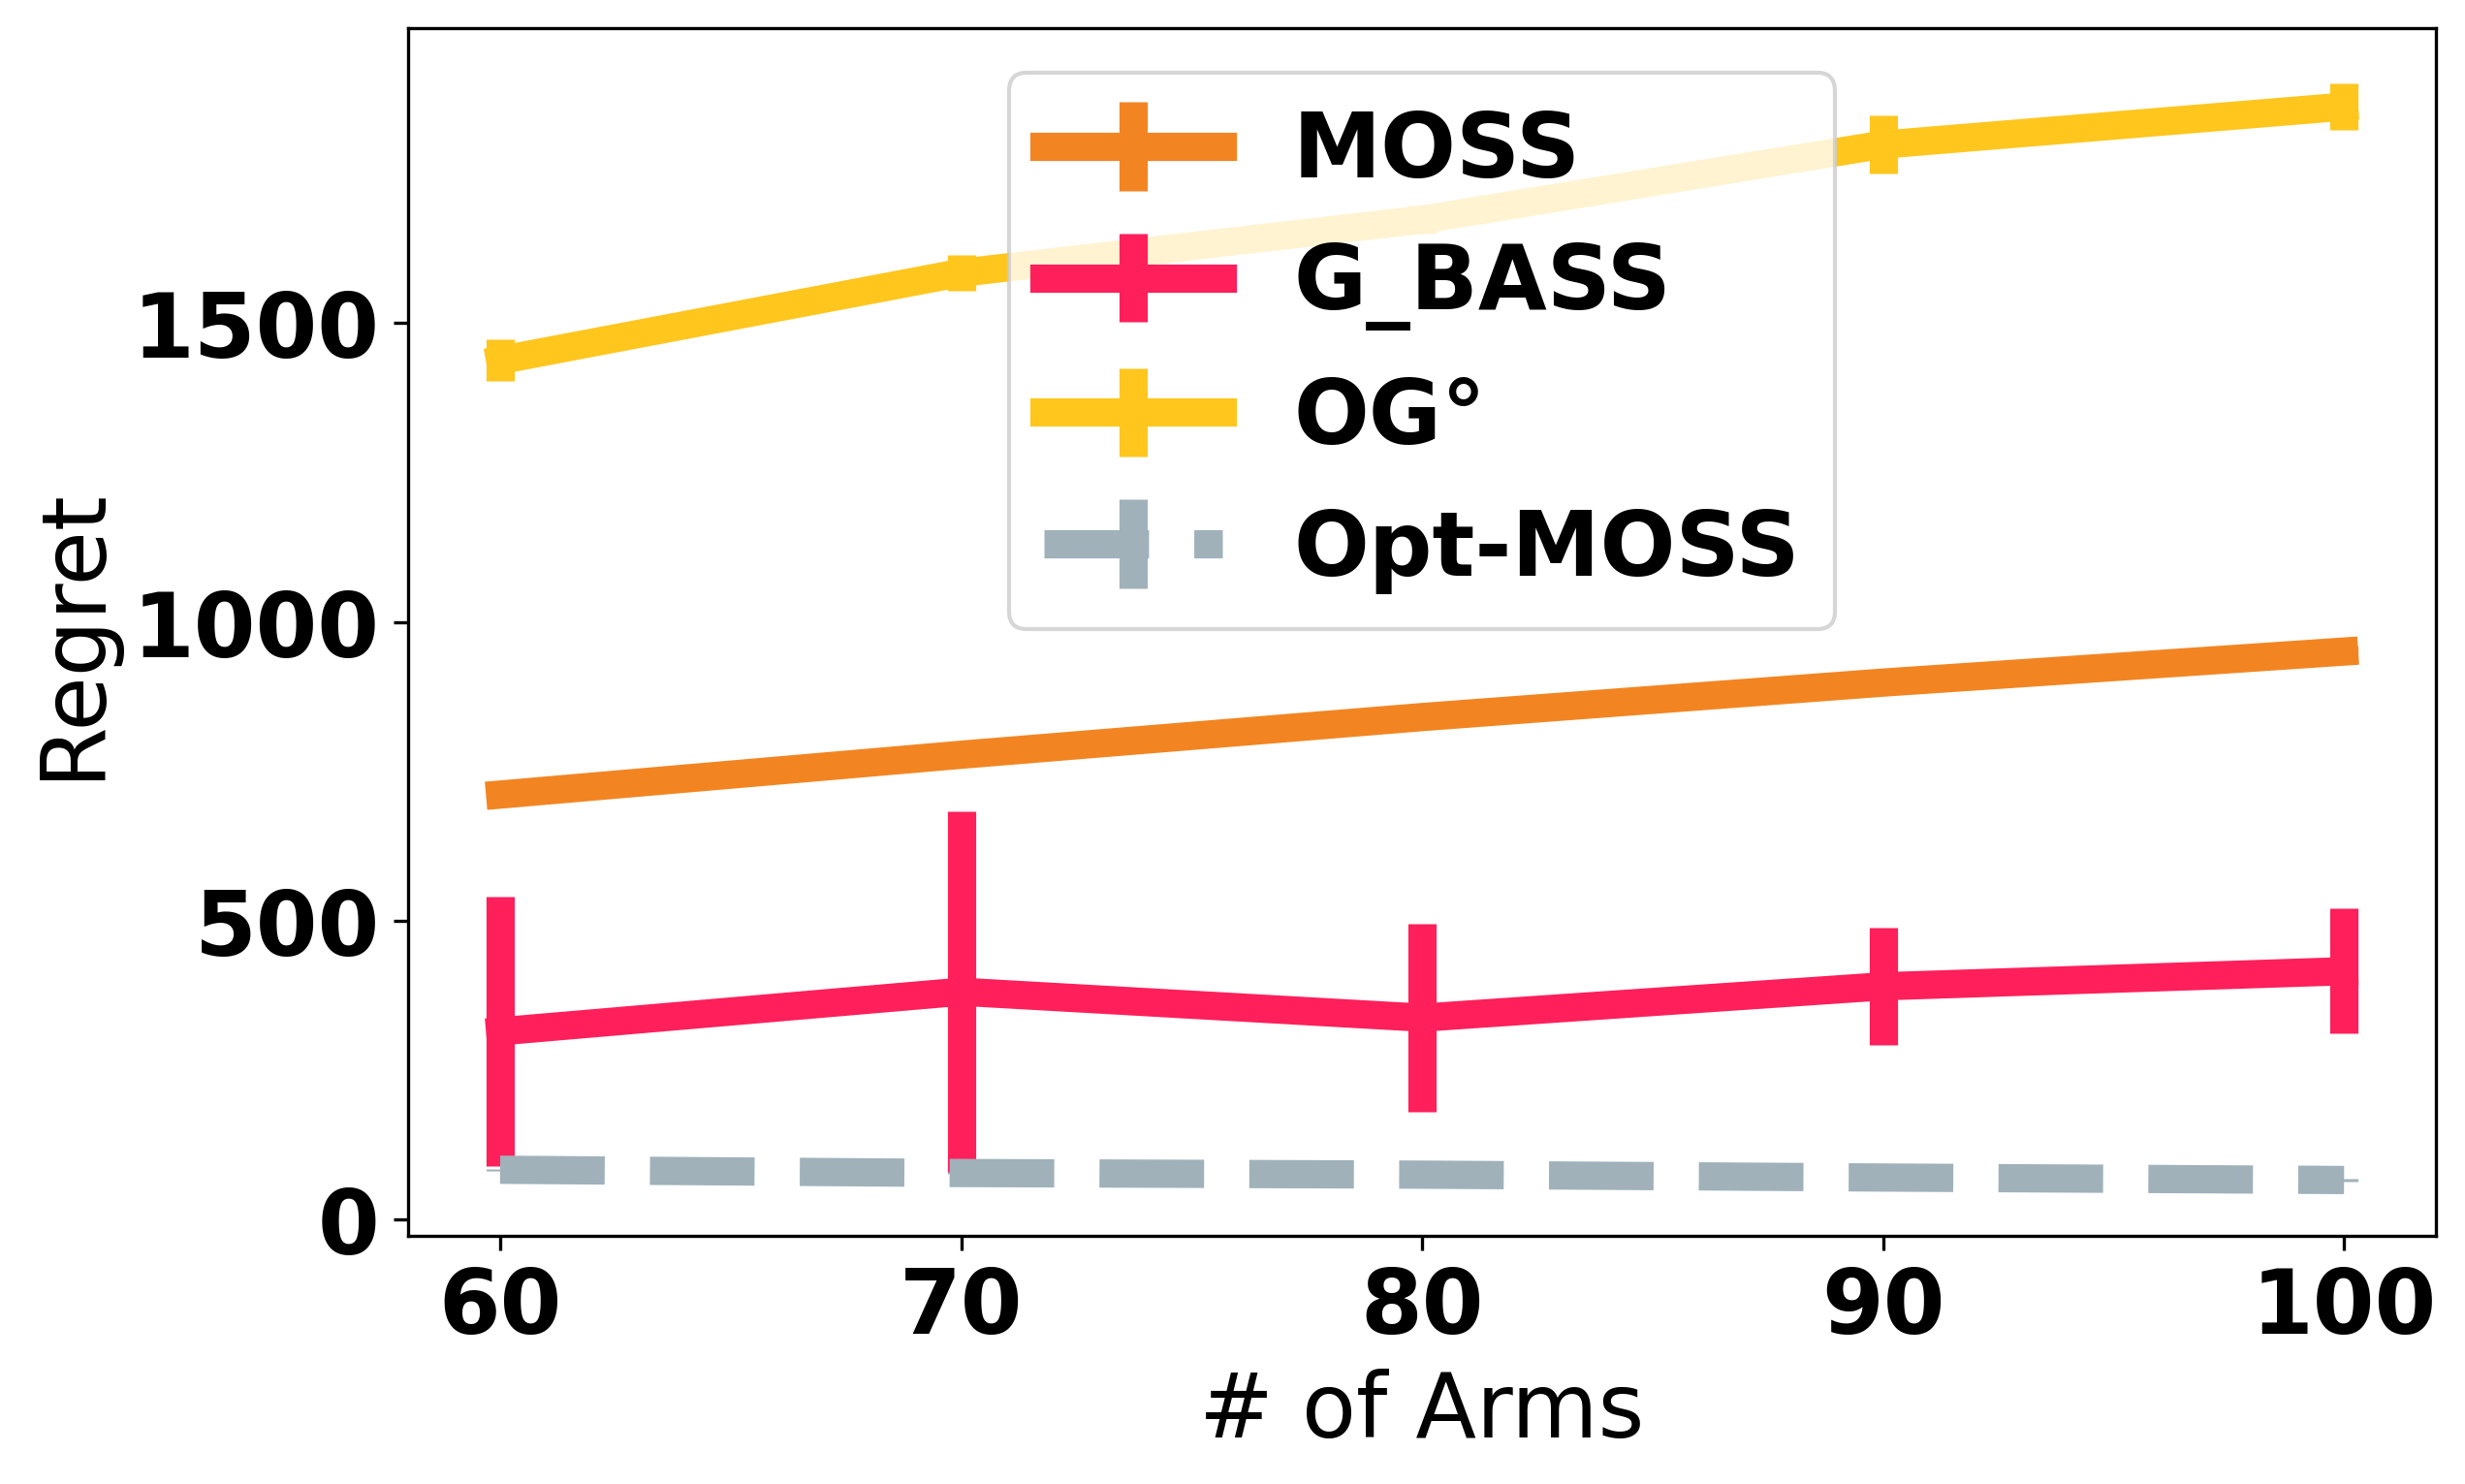

In [18]:
# Plot from loaded cache file
X_b = np.arange(60,109,10) # small
regret_dict_b = pickle.load(open("results/cache_arms.p", "rb"))
utils.plot(X_b, regret_dict_b, '', '# of Arms', 'Regret', **kwargs)

## Regret vs subset size

In [ ]:
# opt_size_list = np.arange(3,25,5)
# (X_e, regret_dict_e, title, xlabel, ylabel) = utils.subset_exp(N_EXPS, 
#                                   N_TASKS, N_ARMS, HORIZON, 
#                                   opt_size_list = opt_size_list, **kwargs)
# # pickle.dump(regret_dict_e, open("results/subset.p", "wb"))
# pass

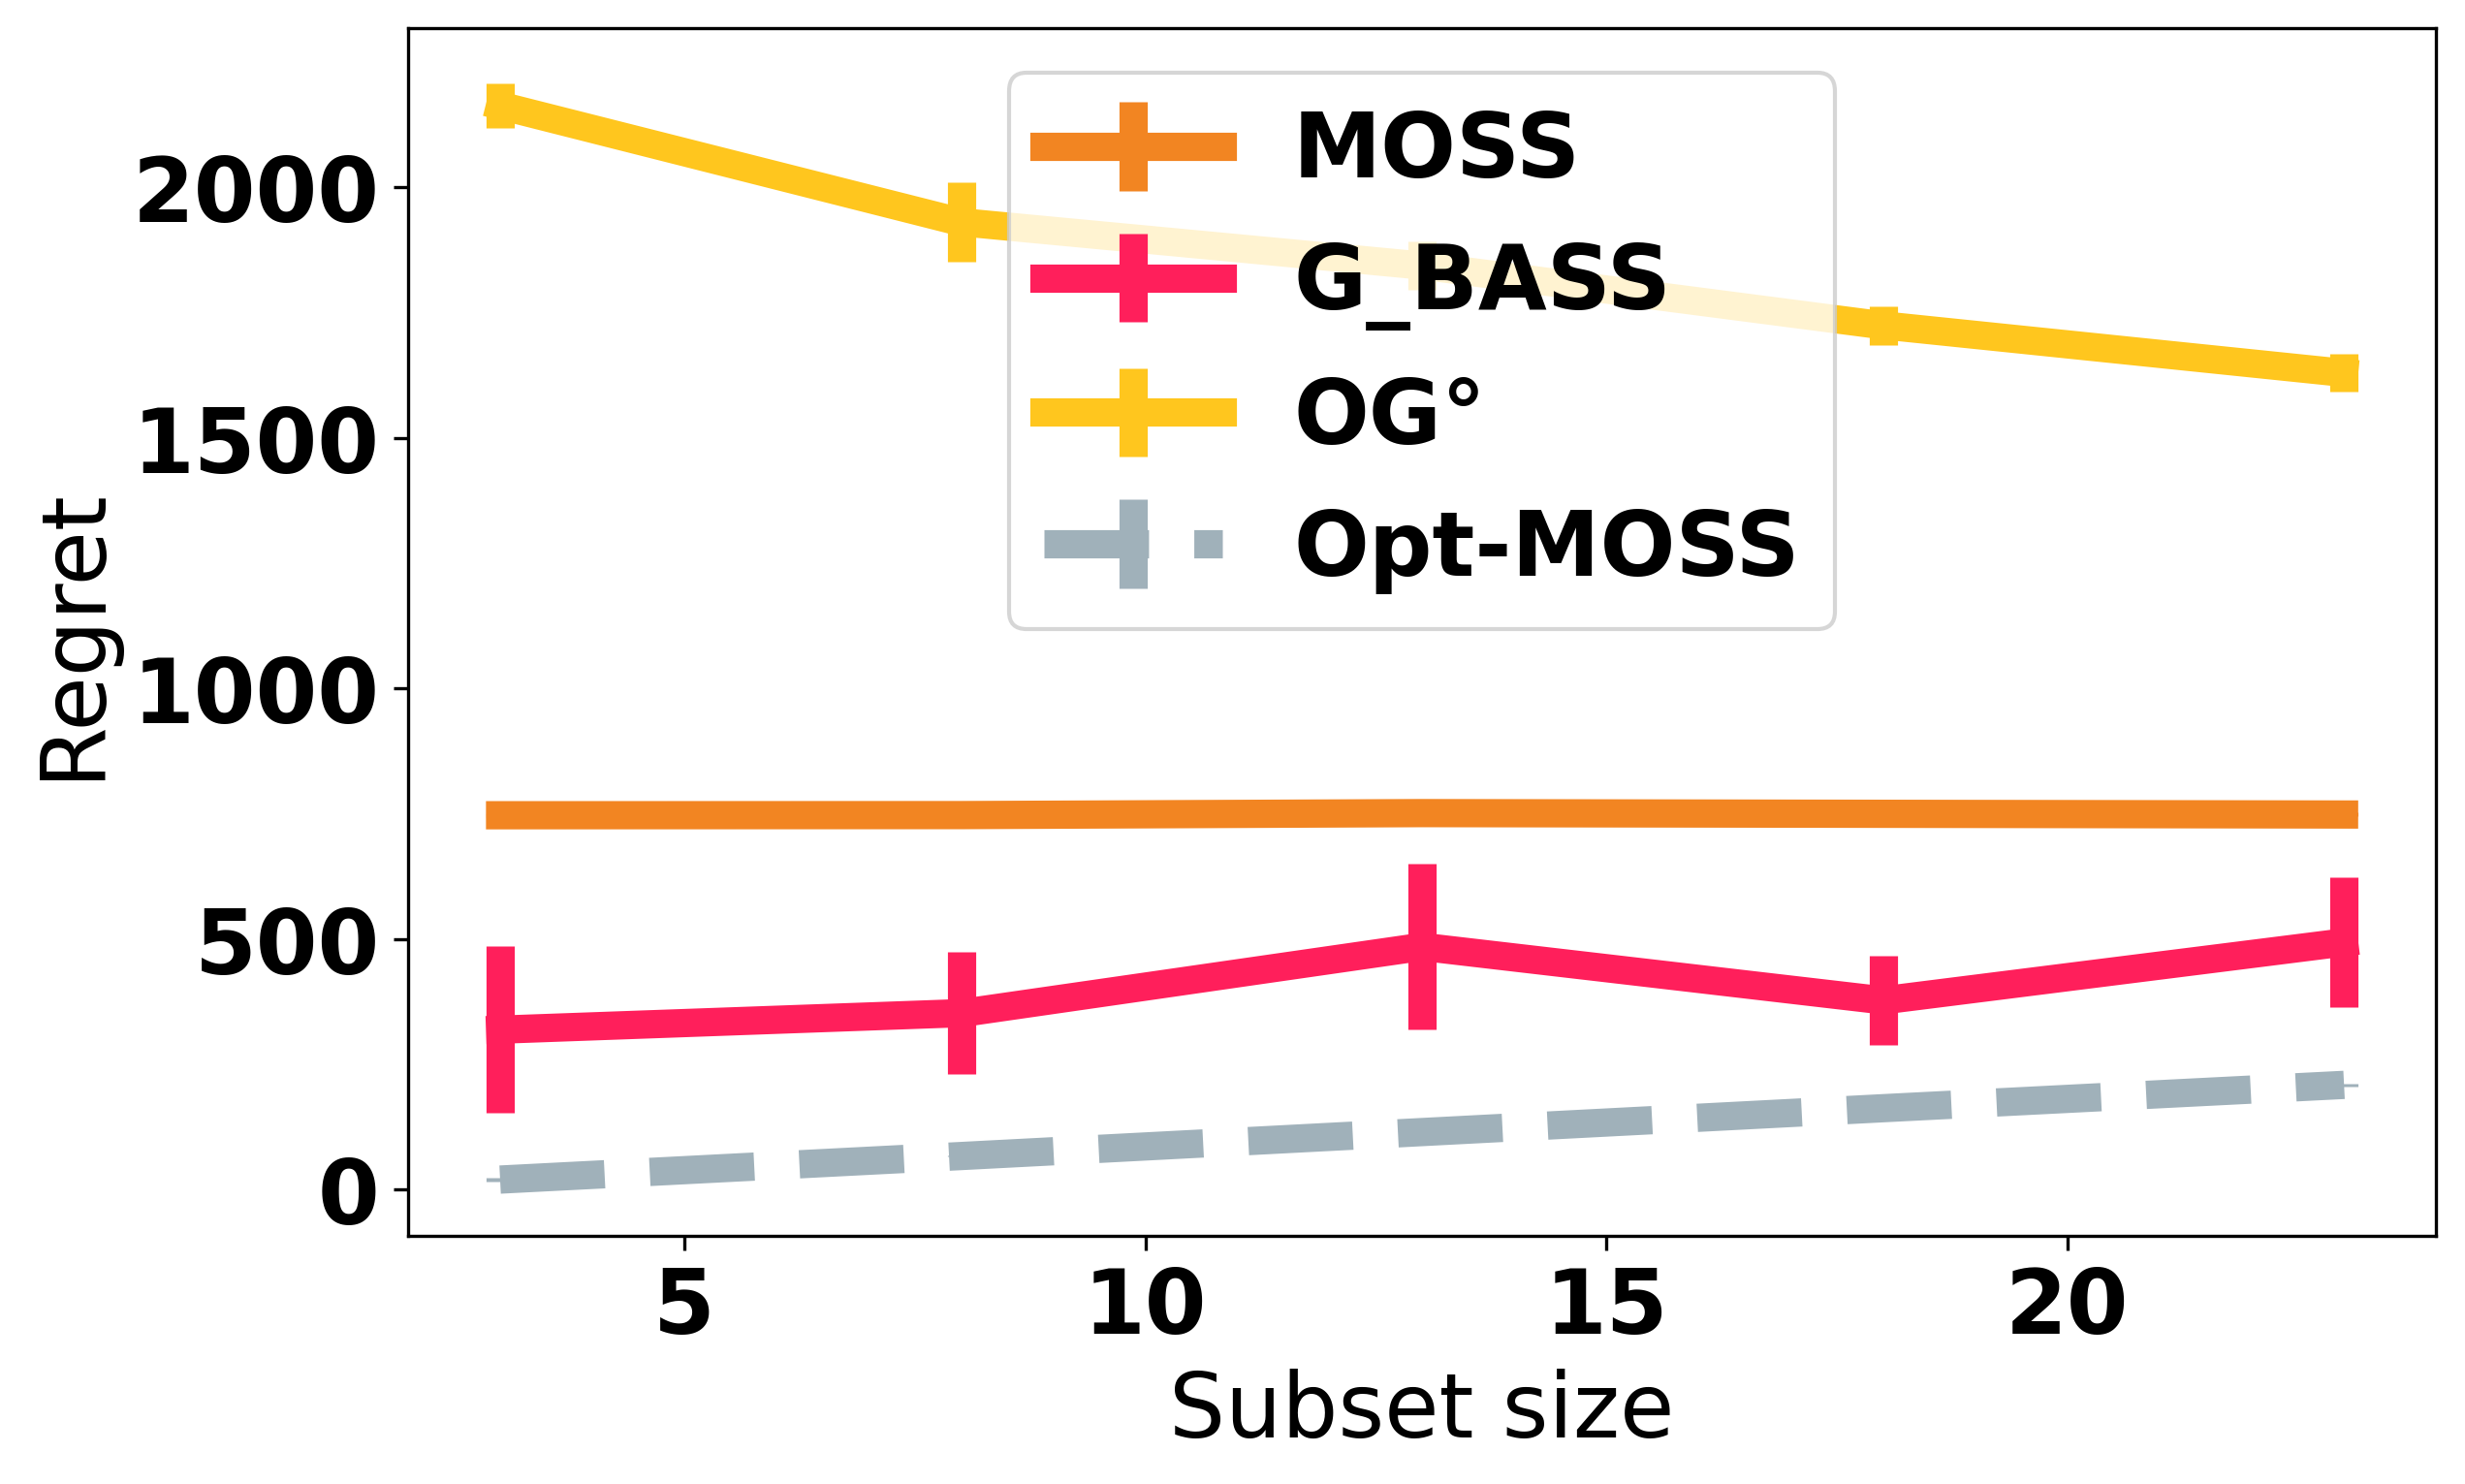

In [17]:
# Plot from loaded cache file
X_e = np.arange(3,25,5)
regret_dict_e = pickle.load(open("results/cache_subset.p", "rb"))
utils.plot(X_e, regret_dict_e, '', 'Subset size', 'Regret', **kwargs)

# Plotting legend code

In [ ]:
# font = {
#         'weight' : 'bold',
#         'size'   : 6}

# plt.rc('font', **font)
# plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['ps.fonttype'] = 42

# plt.rcParams['figure.figsize'] = [7, 5.5] # NIPS format: [9, 5.5]
# # labels = ["MOSS", "G-BASS", "OG°", "Opt-MOSS"]
# labels = ["MOSS", "EE", "G-BASS", "E-BASS", "OG°", "Opt-MOSS"]
# # colors = ["#F28522", "#FF1F5B", "#FFC61E", "#A0B1BA"]
# colors = ["#F28522", "#009ADE", "#FF1F5B", "#00CD6C", "#FFC61E", "#A0B1BA"]
# # linestyles = ["-", "-", "-", "-", "dashed"]
# linestyles = ["-", "-", "-", "-", "-", "dashed"]
# f = lambda c,l: plt.plot([],[], color=c, ls=l, linewidth=4)[0]
# handles = [f(colors[i], linestyles[i]) for i in range(len(labels))]
# legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=False, mode="expand", ncol=len(handles))

# def export_legend(legend, filename="legend6.png"):
#     fig  = legend.figure
#     fig.canvas.draw()
#     bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     fig.savefig(filename, dpi="figure", bbox_inches=bbox)

# export_legend(legend)
# plt.show()